### **1.2 Computer가 Image를 인식하는 방법**

- Image는 $[0, 255]$ 사이의 값을 가지는 Pixel로 구성되어 있음<br>

- Computer가 Image를  인식하는 방법은 Pixel로 이루어진 수많은 숫자를 읽는 것임<br>

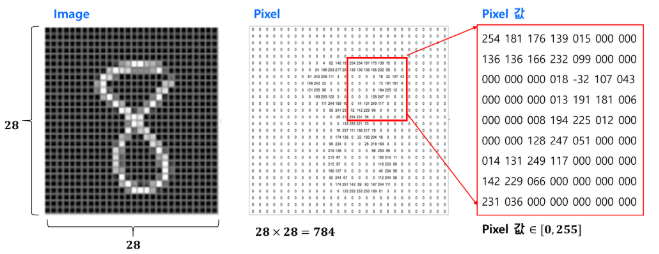

### **1.3 Computer Vision의 Goal**

- Computer Vision에서 우리의 Goal은 <br>
$ \ \ $ (i) 한 Input Image 내에 포함된 여러 <span style="color:red"> Object들을 찾아내고</span> <br>
$ \ \ $ (ii) <span style="color:red"> 각 Object들을 포함하는 Bounding Box의 위치촤표</span>를 찾는 것임<br>
$\quad$ $\checkmark \ $ 위치좌표를 표현하는 방법은 <br>
$\qquad$ <span style="color:blue"> **(좌표 표현방법 1)** </span> 좌측상단의 좌표 $ \left( x_1, y_1 \right)$과  우측하단의 좌표$ \left( x_2, y_2 \right)$으로 지정함<br>
$\qquad$ <span style="color:blue"> **(좌표 표현방법 2)** </span> Bounding Box의 중심좌표  $ \left( x, y \right)$와 폭 $w$와 높이 $h$로 표시할 수 있음<br>

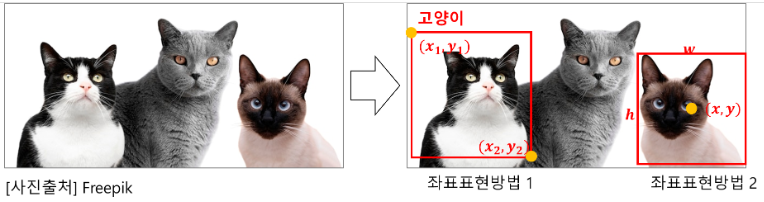

## **2. Computer Vision의 세부 과제들**

- <span style="color:red">Computer Vision 이란</span> Digital Image로부터 Object(객체)를 분별해내는 작업과 관련한 다음과 같은  4대  <br> 과제들을 말함<br>
$ \ \ $ (i) 하나 또는 복수개의 Object의 Class를 구분하는 <span style="color:red">Classification 문제</span><br>
$ \ \ $ (ii) 하나의 Object의 위치(좌표)를 찾는 <span style="color:red">Localization 문제</span> <br>
$ \ \ $ (iii) 복수개의 Object의 Class를 구분하고 Object의  위치를  동시에 찾는 <span style="color:red">Detection 문제</span><br>
$ \ \ $ (iv) Pixel 또는 의미에 따른 복수개의 Object의 영역을 구분하는 <span style="color:red">Segmentation 문제</span><br>


- Computer Vision에서는 Object Detection(Classification + Location 좌표) 후 찾아진 Object에 대해  <br> Database에 등록된 List인지 Identification하는 과정까지를 의미함

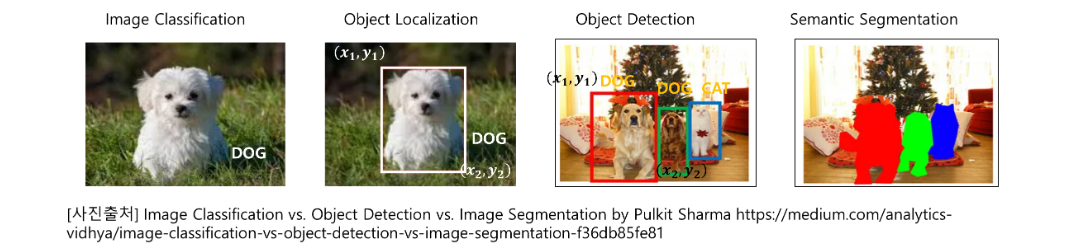

### **5.2 Object Detection Process**

- Object Detection을 수행하기 위해서는 다음과 같은 과정을 거침

항목 | 설명
:----:|:----
 영역제안<br> (Region Proposal) |  $\bullet \ $ Input Image 내에 Object가 존재할 만한 ROI(Region of Interest) 를  <br> $ \ \ \ $ 제안하는 Algorithm 또는 Deep Neural Network   <br> $\bullet \ $ Object가 존재할 만한 많은 수의 <span style="color:blue">**후보 Bounding Box를 출력**</span>함<br> $ \ \ $ $\checkmark \ $ 각 Bounding Box에 대해서는 Object가 존재할 확률을 제공함
 비최대억제<br> (Non$-$Maximim Supression) |  $\bullet \ $ 각 Object 별로 존재하는 많은 수의 Bounding Box들 에 대해 다음 <br>$ \ \ \  $ 과정을 수행 <br> $ \ \ $ (1) Object를  포함하는 <span style="color:blue">**최소 크기를 가지는 하나의 Bounding Box를 선택**</span> <br> $ \ \ $ (2) 찾아진 최소 크기의 <span style="color:blue">**Bounding Box의 위치 및 크기를 조정**</span> 
 특징(Feature) 추출  |  $\bullet \ $ 각 Bounding Box가 포함하고 있는 <span style="color:blue">**Object의 Feature들을 추출**</span> <br> $ \ \ $ $\checkmark \ $ Convolution Neural Network 또는 Transfer Learning을 활용
 Classification |  $\bullet \ $  추출된 Feature에 기반하여 Bounding Box 내에 존재하는 <span style="color:blue">**Object의  <br> $ \ \ \ $ Class를 예측**</span>함 <br> $ \ \ $ $\checkmark \ $ Support Vector Machine등 Classification을 할 수 있는 Model을 적용
 Bounding Box 좌표 예측<br> $ \left( x, y \right), w, h$ |  $\bullet \ $ 추출된 Feature에 기반하여 해당 <span style="color:blue">**Bounding Box의 좌표를 예측**</span><br> $ \ \ $ $\checkmark \ $ Fully Connected Neural Network 등을 사용
 평가지표 |  $\bullet \ $ Prediction된 Object Classification에 대한 평가지표들<br> $ \ \ $ $\checkmark \ $ mAP(Mean Average Precision), PR곡선, IoU(Intersection of Union)등

[참고자료] 07_01_01 컴퓨터비전(Computer Vision).ipynb

##  **1. Image Segmentation**

### **1.1 Segmentation 개요**

- Image Segmentation은 Image Classification의 확장으로, Image에 포함된 Object Classification 뿐  아니라 Image의 <br>   각 Pixel이  사전에 정의한 어느 Object(Class)에 속하는지 판단하는 Computer Vision 기술을 말함<br>
$ \ \ $ $\checkmark \ $ 사전에 정해진 Class를 분류하는 과제임<br>
$ \ \ $ $\checkmark \ $ 배경(Backbround)도 하나의 Class로 구분함

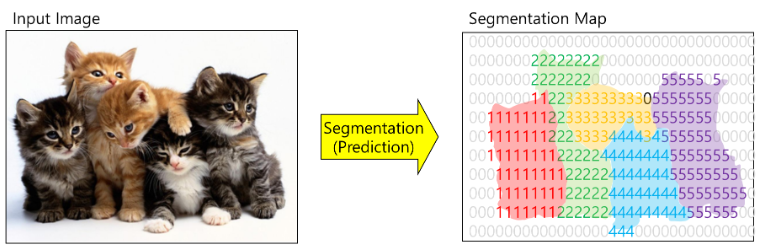

>$\quad$ **[용어]** <br>
>
>$\quad  \ \ $ **Segmentation**과  **시맨틱 분할(Sementic Segmentation)** 은 같은 의미의 용어임

- Image Classification과 Image Segmentation과의 차이


작업(Task) | $\qquad \qquad$ 설명 | $\qquad$ 출력 예시
:----:|:----|:----
이미지 분류 <br> (Image Classification)|  $\bullet \ $ <span style="color:red">**Input되는 각 Image에 대해 하 <br> $ \ \ \ $ 나의 Label**</span> 을 할당하는 문제 |  $\bullet \ $  이 Image는 고양이임
객체 탐지 <br> (Object Detection) |  $\bullet \ $ 이미지 내에 있는 객체들의 위치<br> $ \ \ \ $ ( Bounding  Box)와 레이블을 찾음 |  $\bullet \ $  Image의 $(x_1, y_1)$에서 $(x_2, y_2)$  <br> $ \ \ \ $ 위치에 고양이가 있음
이미지 분할 <br> (Image Segmentation) |  $\bullet \ $ 이미지의 모든 픽셀을 특정 <br> $ \ \ \ $ 레이블로 분류 |  $\bullet \ $ $(x_1, y_1)$ Pixel은 고양이, <br> $ \ \ \ $  $(x_2, y_2)$ Pixel은 Background임

### **1.2 Image Segmentation의 종류**

[참고자료] Alexander Kirillov, Kaiming He, Ross Girshick, Carsten Rother, Piotr Dollár, Panoptic Segmentation, <br> $\qquad \qquad  $ arXiv:1801.00868 [cs.CV], 2019


구분 | $\qquad \qquad \qquad $ 설명 
:----:|:----
 Semantic <br> Segmentation |  $\bullet \ $ Input Image에 포함된 여러 Class의 Object에 대해 같은 Class의 Object들의  Pixel에  <br> $ \ \ \ $ 같은 Class Label을 할당하는 Segmentation 방법 <br> $\bullet \ $ Semantic Segmentation은 Image에 포함된 Object를 여러 의미적 Class로 나눌 수 <br> $ \ \ \ $  있다는 원칙에 기반한 방법임  <br> $ \ \ $ $\checkmark \ $ 이러한 의미적 Class를 사용하여 Image에서 Object를 식별하는 방법 <br> $\bullet \ $ Semantic Segmentation은 각 Image의 Pixel에 Semantic Label을 할당하는 Image <br> $ \ \ \ $ Segmentation의 한 유형임<br> $ \ \ $ $\checkmark \ $ 즉, 각 Pixel에 ‘도로’, ‘나무’, ‘건물’과 같이 해당 Object를 설명하는 Label을 <br> $ \qquad$ 할당하는 방법   <br> $\bullet \ $ <span style="color:red"> Semantic Segmentation은 동일한 Class의 다른 Object를 구별할 수 없음</span> <br> $ \ \ $ $\checkmark \ $ 즉,  <span style="color:red"> 같은 Class에 해당하는  Object를 구성하는 Pixel들에 대해 같은 Class를 할당함</span>  <br> $ \ \ $ $\checkmark \ $ Semantic Segmentation은 먼저 대상 Object를 감지한 후에  각 Pixel에 Label이 <br> $ \qquad$ 지정됨 <br> $\bullet \ $  Semantic Segmentation Model로  DeepLab, FastFCN, DeepLabV3, Transformer based Models 등이 있음 
 Instance <br> Segmentation |  $\bullet \ $ Image에 포함된 <span style="color:red"> 서로 다른 Object(Class가 같을 수도 있음)에 고유한 Ground Truth를  <br> $ \ \ \ $ 할당</span>하고 <span style="color:red"> 동일한 Class에 속하는 Object들을 구별할 수 있는 경계를 식별</span>하기 위한 <br> $ \ \ \ $  Segmentation 방법  <br> $ \ \ $ $\checkmark \ $ Instance Segmentation은 Image에 포함된 Object가 모양이나 Context에 따라 <br> $ \qquad$ Image의 개별 Object를 구별하고 세분화할 수 있음  <br> $ \ \ $ $\checkmark \ $ 동일한 Class의 다른 Object를 구분할 수 있음(다른 책상은 다른 Color로 구분됨) <br> $\bullet \ $ Instance Segmentation은 Object 탐지와 Pixel에 Class Label을 할당하는 Segmentation이 <br> $\quad  \ \ \ $ 동시에 수행됨 <br> $\bullet \ $  Instance Segmentation은<span style="color:red">  Mask R$-$CNN Architecture Model 기반으로 수행</span>됨 <br> $ \ \ $ $\checkmark \ $ Bottom$-$Up 방식  <br> $ \ \ $ $\checkmark \ $ Top$-$Down 방식
 Panoptic <br> Segmentation  |  $\bullet \ $ Semantic Segmentation과 Instance Segmentation이 결합된 Segmentation 방식임<br> $ \ \ $ $\checkmark \ $ <span style="color:red">셀 수 있는 Object</span>에 대해서는 <span style="color:blue">Instance Segmentation</span>을 진행 <br> $\quad$ $\cdots \ $  고양이1과 고양이2를  구분하여 Segmentation함  <br> $ \ \ $ $\checkmark \ $ <span style="color:red">셀 수 없는 Object</span>에 대해서는 <span style="color:blue">Semantic Segmentation</span>을 진행  <br> $\quad$ $\cdots \ $ Background는 셀수 없는 Object로 봄, 도로변의 가로수는 셀 수 없는 Object로 봄

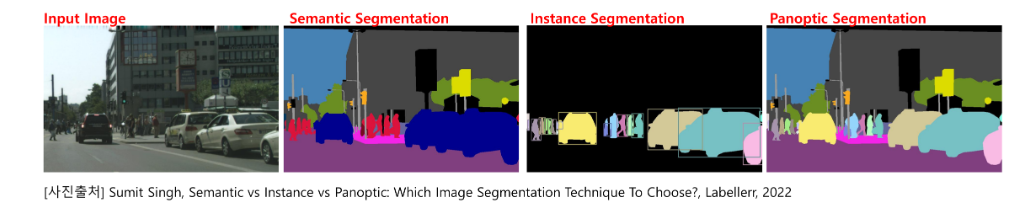

[참고자료] 07_07_02 Image Segmentation기초.ipynb

## **1. Deep Neural Network과 Segmentation**
### **1.1 기존 DNN의 Segmentation 적용의 한계**

- AlexNet, VGG 등 Classification에 사용해 온 Deep Neural Network Model들은 Semantic Segmentation에  <br>적합하지 않음<br> 
$ \ \ $ $\checkmark \ $ 기존 Deep Neural Network Model들은 Input Image의 차원을 변화시키는 layer들(Convolution layer, <br> $\qquad$ Pooling layer, Activation layer)들을 거치게 되면서 Input Image의 각 Pixel의 위치정보를 잃게 되거나 <br> $\qquad$  왜곡되게 됨<br>
$ \ \ $ $\checkmark \ $ 특히, 마지막 Convolution layer의 결과를 Flatten하여 Fully Connected layer를 연결하는 경우 Fully <br> $\qquad$  Connected Layer내의 선형변환 과정에서 Pixel의 위치정보를  잃게 되어 Segmentation을 수행할 수 <br> $\qquad$ 없게 됨

### **1.2 DNN을 Segmentation에 적용하기 위한 Autoencoder Architecture**

- DNN에서 위치정보를 보존하기 위한 방법<br>
$ \ \ $ (i) Fully Convolution layer만으로 구성된 Deep Neural Network<span style="color:red">(FCN, Fully Convolution Network)</span>을 사용<br>
$ \ \ $ (ii) Pooling layer와 Fully Connected Layer를 제거<br>

- 하지만 Pooling layer의 제거로 Input Image의 크기가 유지되어 많은 Filter Parameter 추정에 계산량이  <br> 증가하는 문제가 발생함<br>
$ \ \ $ $\checkmark \ $ 이러한 계산량의 문제는 <span style="color:red">Autoencoder 구조를 이용</span>하여 해결함<br>
$\quad$ $\cdots \ $ <span style="color:red">Encode</span>r에서 계산량을 줄이기 위한  <span style="color:blue">**Downsampling**</span>을 수행<br> 
$\quad$ $\cdots \ $ <span style="color:red">Decoder</span>에서는 Segmentation을 위한 Input Image로 키우는  <span style="color:blue">**Upsampling**</span> 하는 방법을 사용하여 <br> $\qquad \quad $ 해결할 수 있음<br>

- Autoencoder의 구조를 이용한 Segmentation 방법으로는 FCN, SegNet, UNet 등이 있음

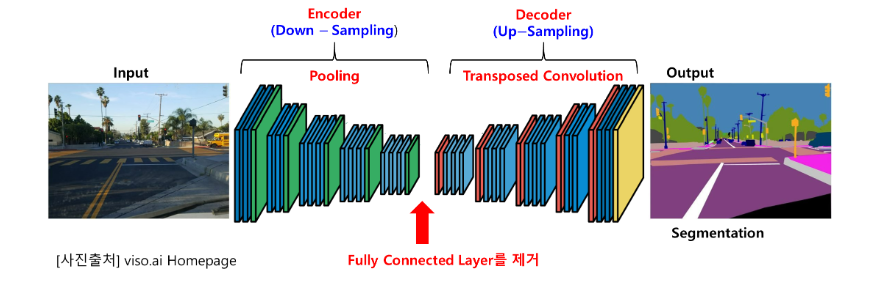

- **Downsampling의 목적**<br>
$ \ \ $ $\checkmark \ $ Input Image의 크기(차원)를 줄여서 적은 계산량과 적은 Memory로 Deep Convolution을 수행함<br>
$\quad$ $\cdots \ $ 이러한 Convolution layer 내의 Pooling 과정에서 위치정보를 일부 잃게 됨<br>
$\quad$ $\cdots \ $ 이렇게 위치정보를 일부 잃어버리는 손해를 감수하더라도 Autoencoder의 차원축소 과정을 통해  <br> $\qquad  \quad $ 계산량을 줄이는 과정을 선택함<br>

- **Upsampling의 목적**<br>
$ \ \ $ $\checkmark \ $ 가장 낮은 차원을 가지는 Latent vector의 차원을 높여 Input Image와 같은 차원으로 만드는 과정<br>
$ \ \ $ $\checkmark \ $ Upsampling 방법으로 여러가지 방법(Simple Upsampling, Deconvolution, Transposed Convolution   <br> $\qquad$ 등)이 있으나 Computer Vision에서는  Transposed Convolution을 사용함